# Problem 1 - Potential Function

This question concerns the properties of the potential function found in the file <a href="Potential.txt">Potential.txt</a>.

a) Plot the potential given by the data

b) Find the equilibrium point(s) of the potential and show if they are stable or unstable

c) Find and plot the maximum energy of particle bound in this potential

d) Find and plot the allowed region for this bound particle

# Solution:
## a) Plot the potential given by the data

In [383]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [384]:
# Adding file path for Potential.txt and loading data
filepath = r"C:\Users\Yusuf\PycharmProjects\Imperial-Physics-PyProblems\First Year Problems\Mechanics\Potential.txt"
potential_df = pd.read_csv(filepath, skiprows=4, header=None, names=["x","y"],delim_whitespace=True)

In [385]:
potential_df.head()

,x,y
0,0.000000,104.945738
1,0.050505,100.536608
2,0.101010,96.114217
3,0.151515,91.687412
4,0.202020,87.265039


In [386]:
# Converting to numpy arrays
x = np.array(potential_df["x"])
y = np.array(potential_df["y"])

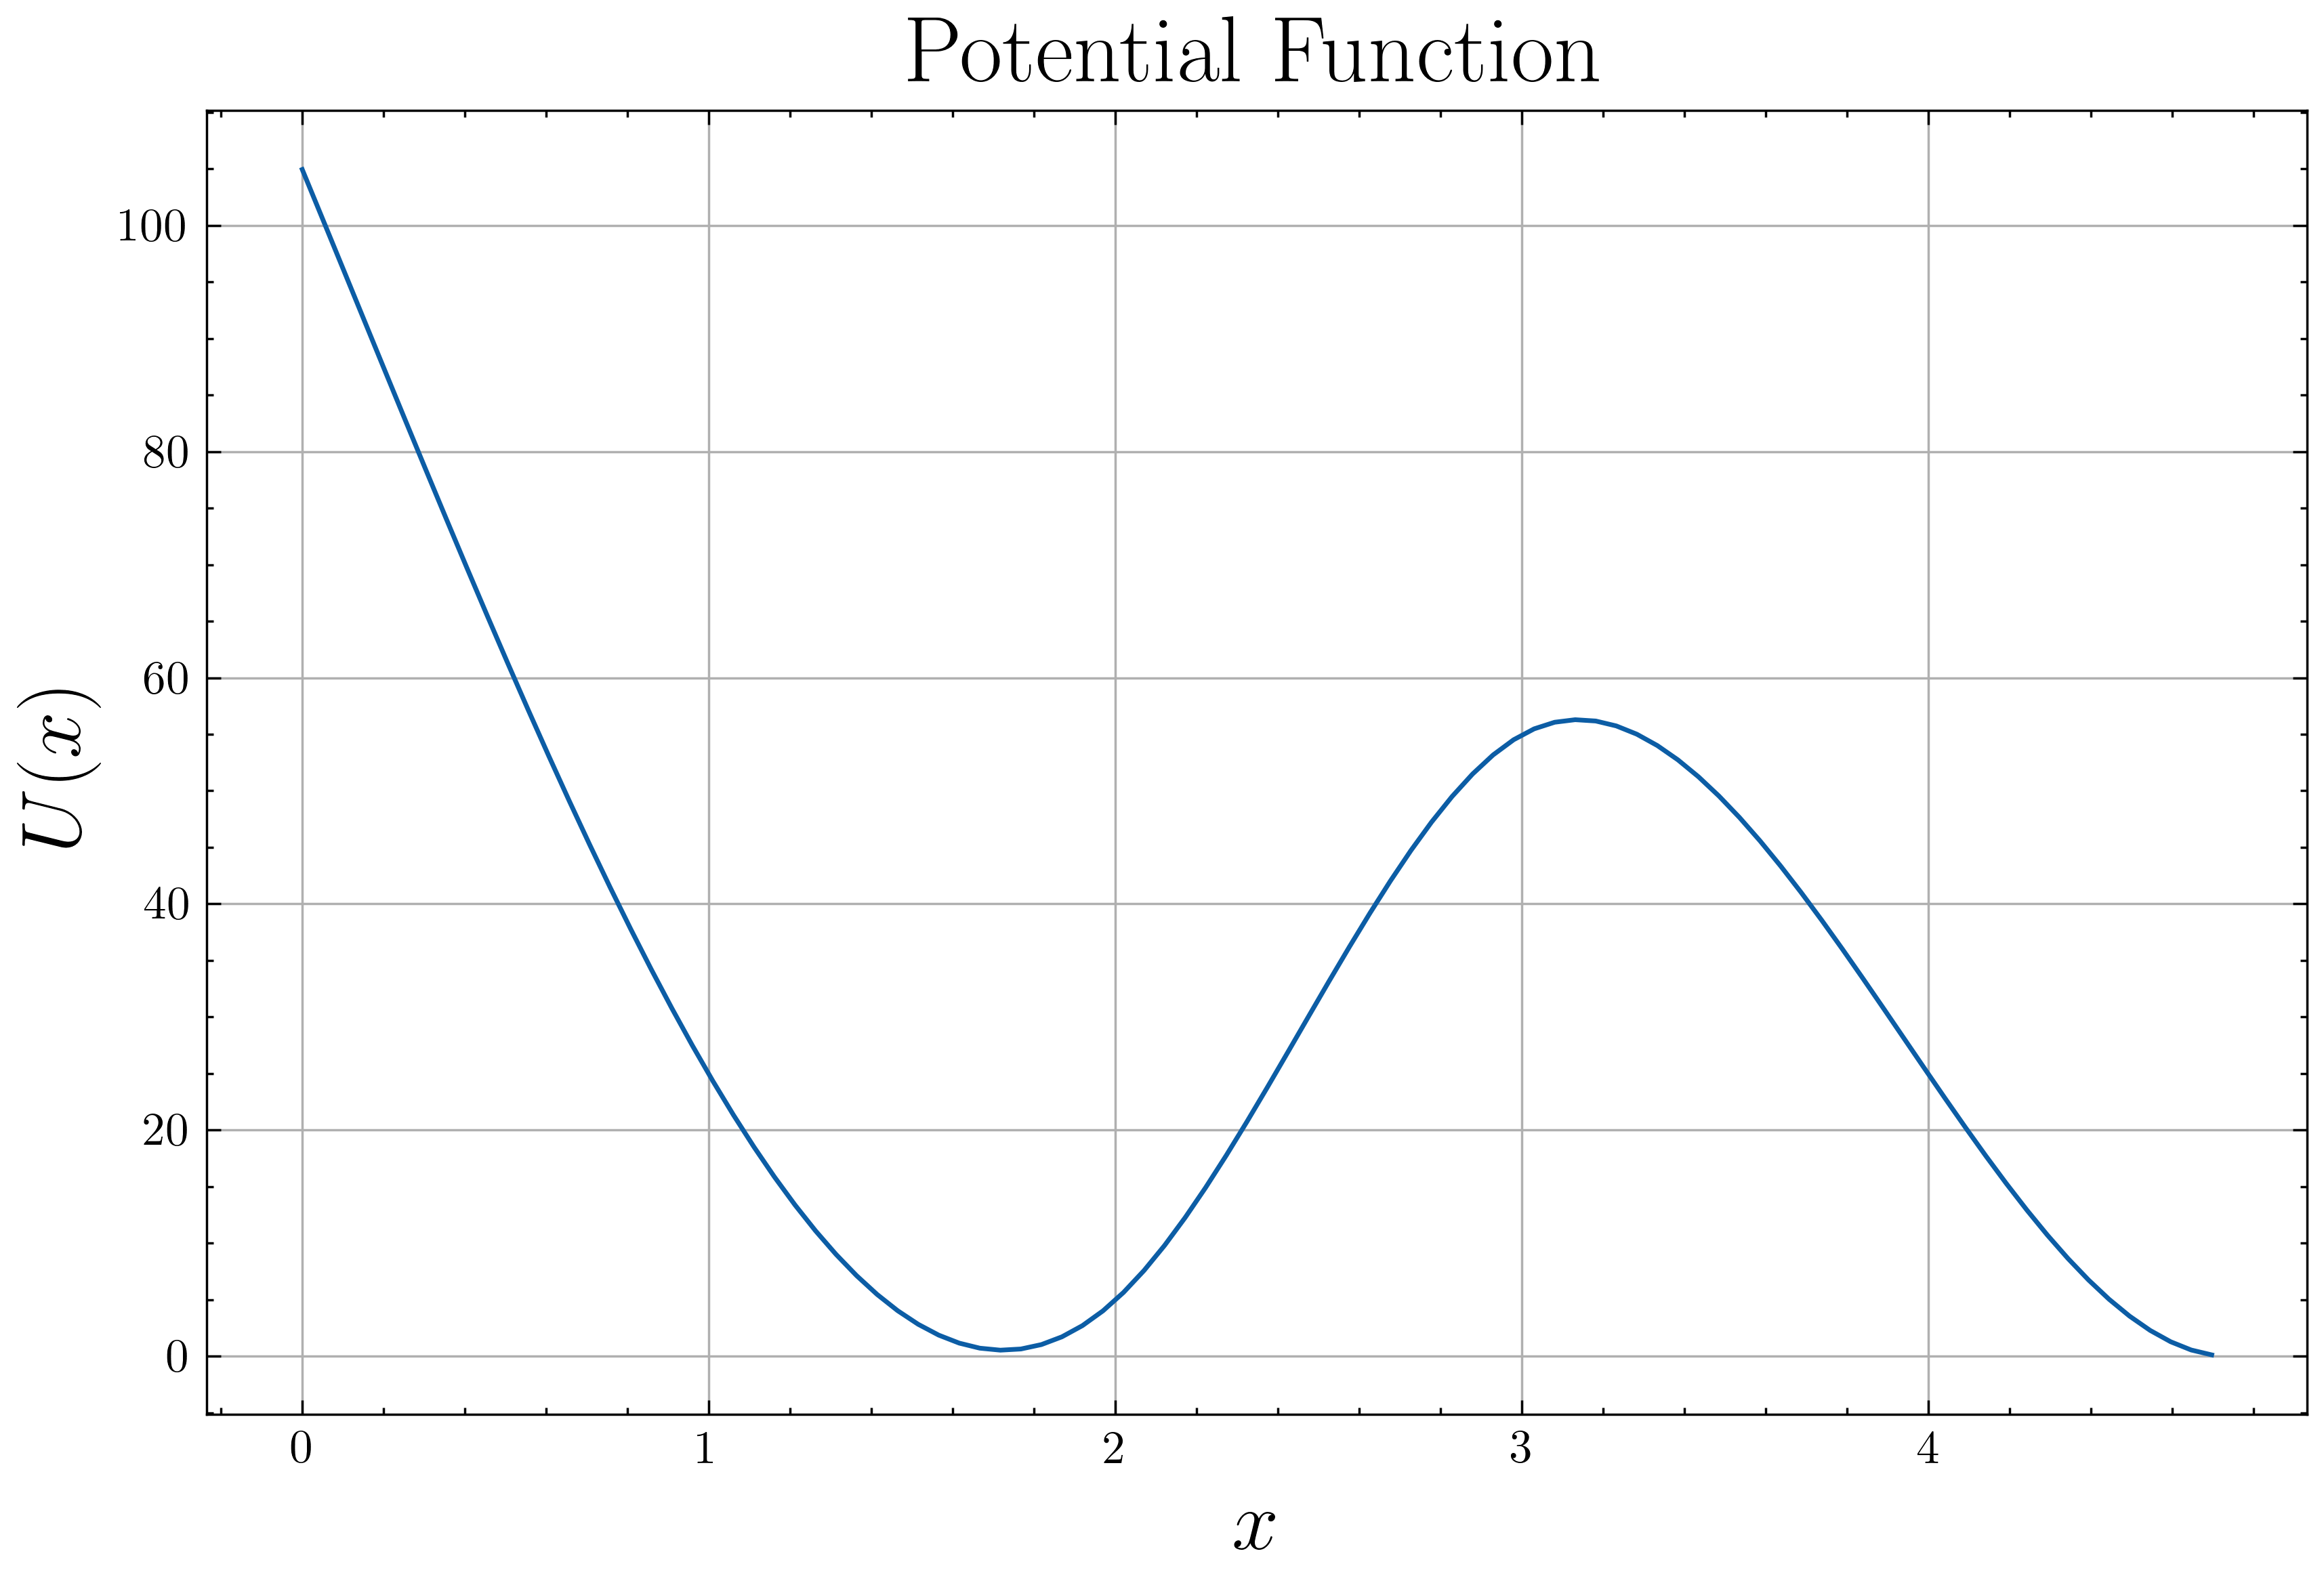

In [387]:
# Plotting the potential
plt.style.use(['science'])
plt.figure(figsize=[8, 5], dpi=500)
plt.title("Potential Function", fontsize=20)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$U(x)$", fontsize=18)
plt.grid(True)
plt.plot(x,y)

## b) Find the equilibrium point(s) of the potential and show if they are stable or unstable

In [388]:
# Finding the first and second derivatives of the potential
derivative = np.gradient(y, x)
second_derivative = np.gradient(derivative, x)

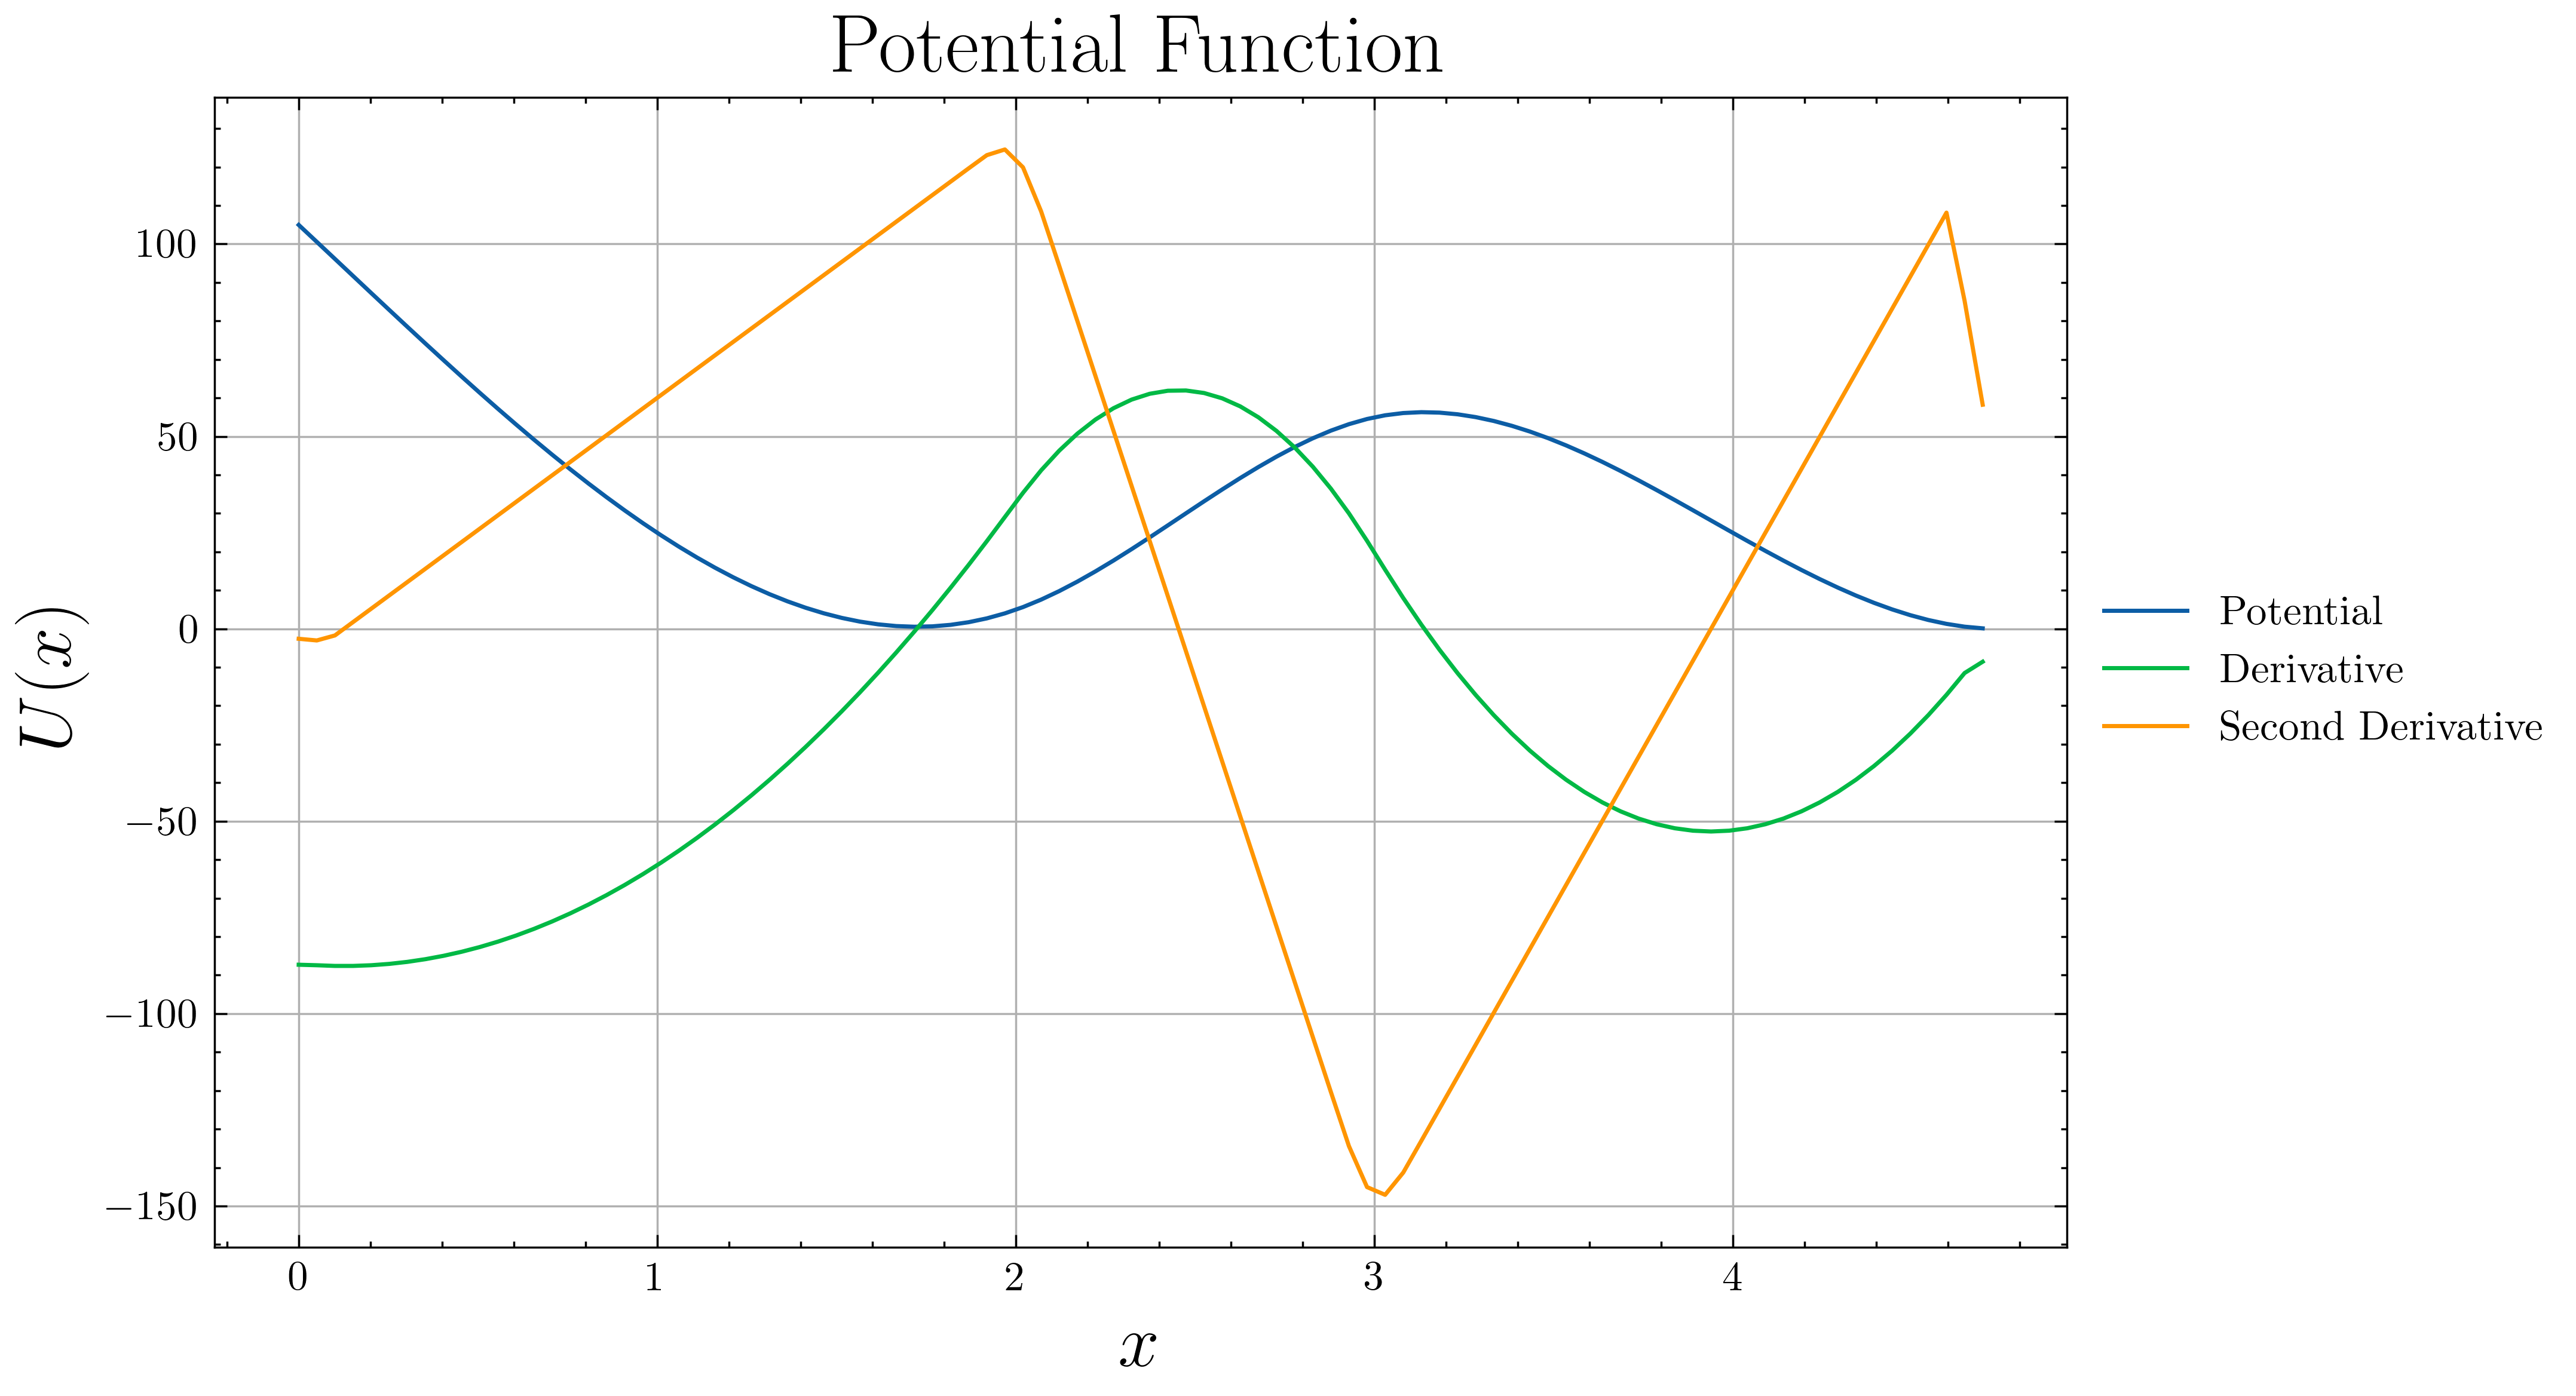

In [389]:
# Plotting the potential with derivatives
plt.figure(figsize=[8, 5], dpi=500)
plt.title("Potential Function", fontsize=20)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$U(x)$", fontsize=18)
plt.grid(True)
plt.plot(x,y, label="$U(x)$")
plt.plot(x,derivative, label="$U'(x)$")
plt.plot(x,second_derivative, label="$U''(x)$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

In [390]:
 # Using scipy to find stationary points and their nature

# Creating functions
potential_function = interp1d(x, y)
derivative_function = interp1d(x, derivative)
second_derivative_function = interp1d(x, second_derivative)

stationary_point_one = fsolve(derivative_function, 1.7, xtol=1e-5) # Finding first stationary point where initial guess is 1.7 and specifying tolerance
stationary_point_two = fsolve(derivative_function, 3.1, xtol=1e-5) # Finding second stationary point where initial guess is 3.1 and specifying tolerance

# Determining stationary points and corresponding potential values
stationary_points_x = [float(stationary_point_one), float(stationary_point_two)]
stationary_points_y = potential_function(stationary_points_x)

# Determining the nature of the stationary points
natures = second_derivative_function(stationary_points_x)

print(f"The first stationary point is at x = {stationary_points_x[0]:.3f}, U(x) = {stationary_points_y[0]:.3f}")
if natures[0] > 0:
    print("This equilibrium point is stable.")
elif natures[0] == 0:
     print("The nature cannot be determined.")
else:
    print("This equilibrium point is unstable.")
    
    
print(f"The second stationary point is at x = {stationary_points_x[1]:.3f}, U(x) = {stationary_points_y[1]:.3f}")
if natures[1] > 0:
    print("This equilibrium point is stable.")
elif natures[1] == 0:
    print("The nature cannot be determined.")
else:
    print("This equilibrium point is unstable.")

The first stationary point is at x = 1.724, U(x) = 0.544
This equilibrium point is stable.
The second stationary point is at x = 3.140, U(x) = 56.267
This equilibrium point is unstable.


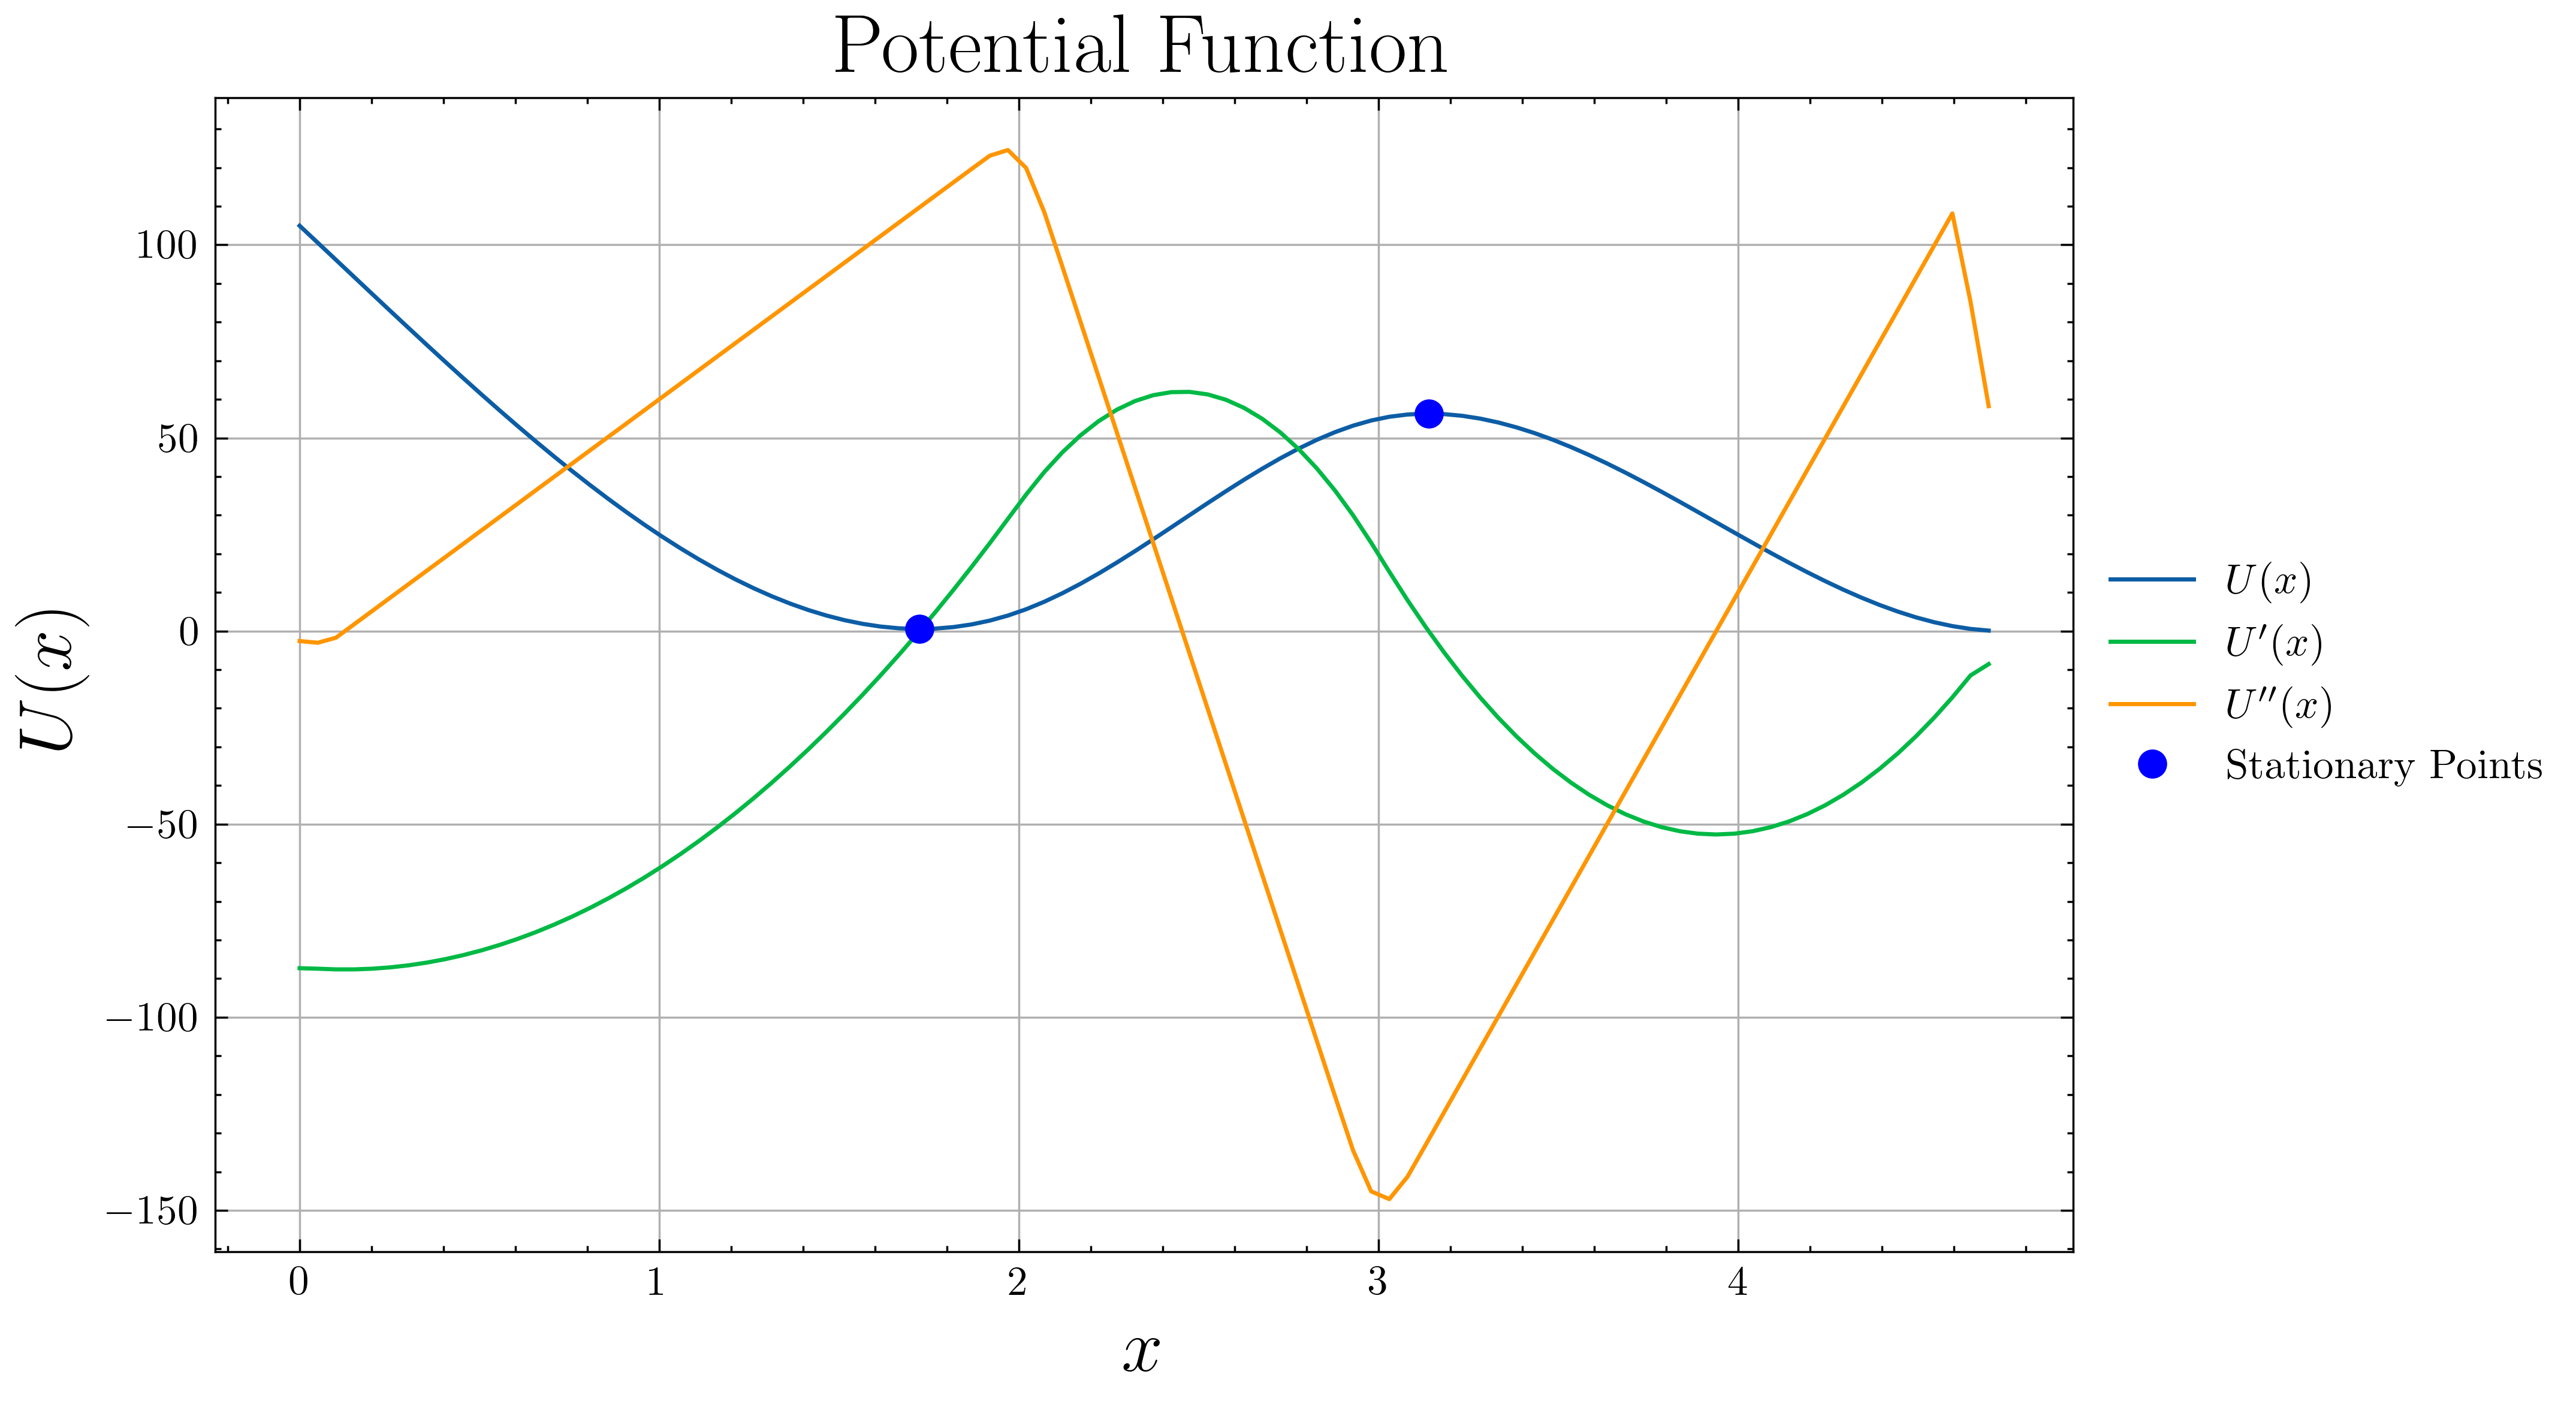

In [391]:
#Creating final plot
plt.figure(figsize=[8, 5], dpi=500)
plt.title("Potential Function", fontsize=20)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$U(x)$", fontsize=18)
plt.grid(True)
plt.plot(x,y, label="$U(x)$")
plt.plot(x,derivative, label="$U'(x)$")
plt.plot(x,second_derivative, label="$U''(x)$")
plt.plot(stationary_points_x,stationary_points_y,"o", label="Stationary Points",color="b")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

## c) Find and plot the maximum energy of particle bound in this potential

The turning points on the graph are where the particle's kinetic energy is zero. At these points, the particle's total energy is entirely potential energy because the particle momentarily stops before changing direction. The maximum energy of the **bound** particle will correspond to the local maximum on the graph.

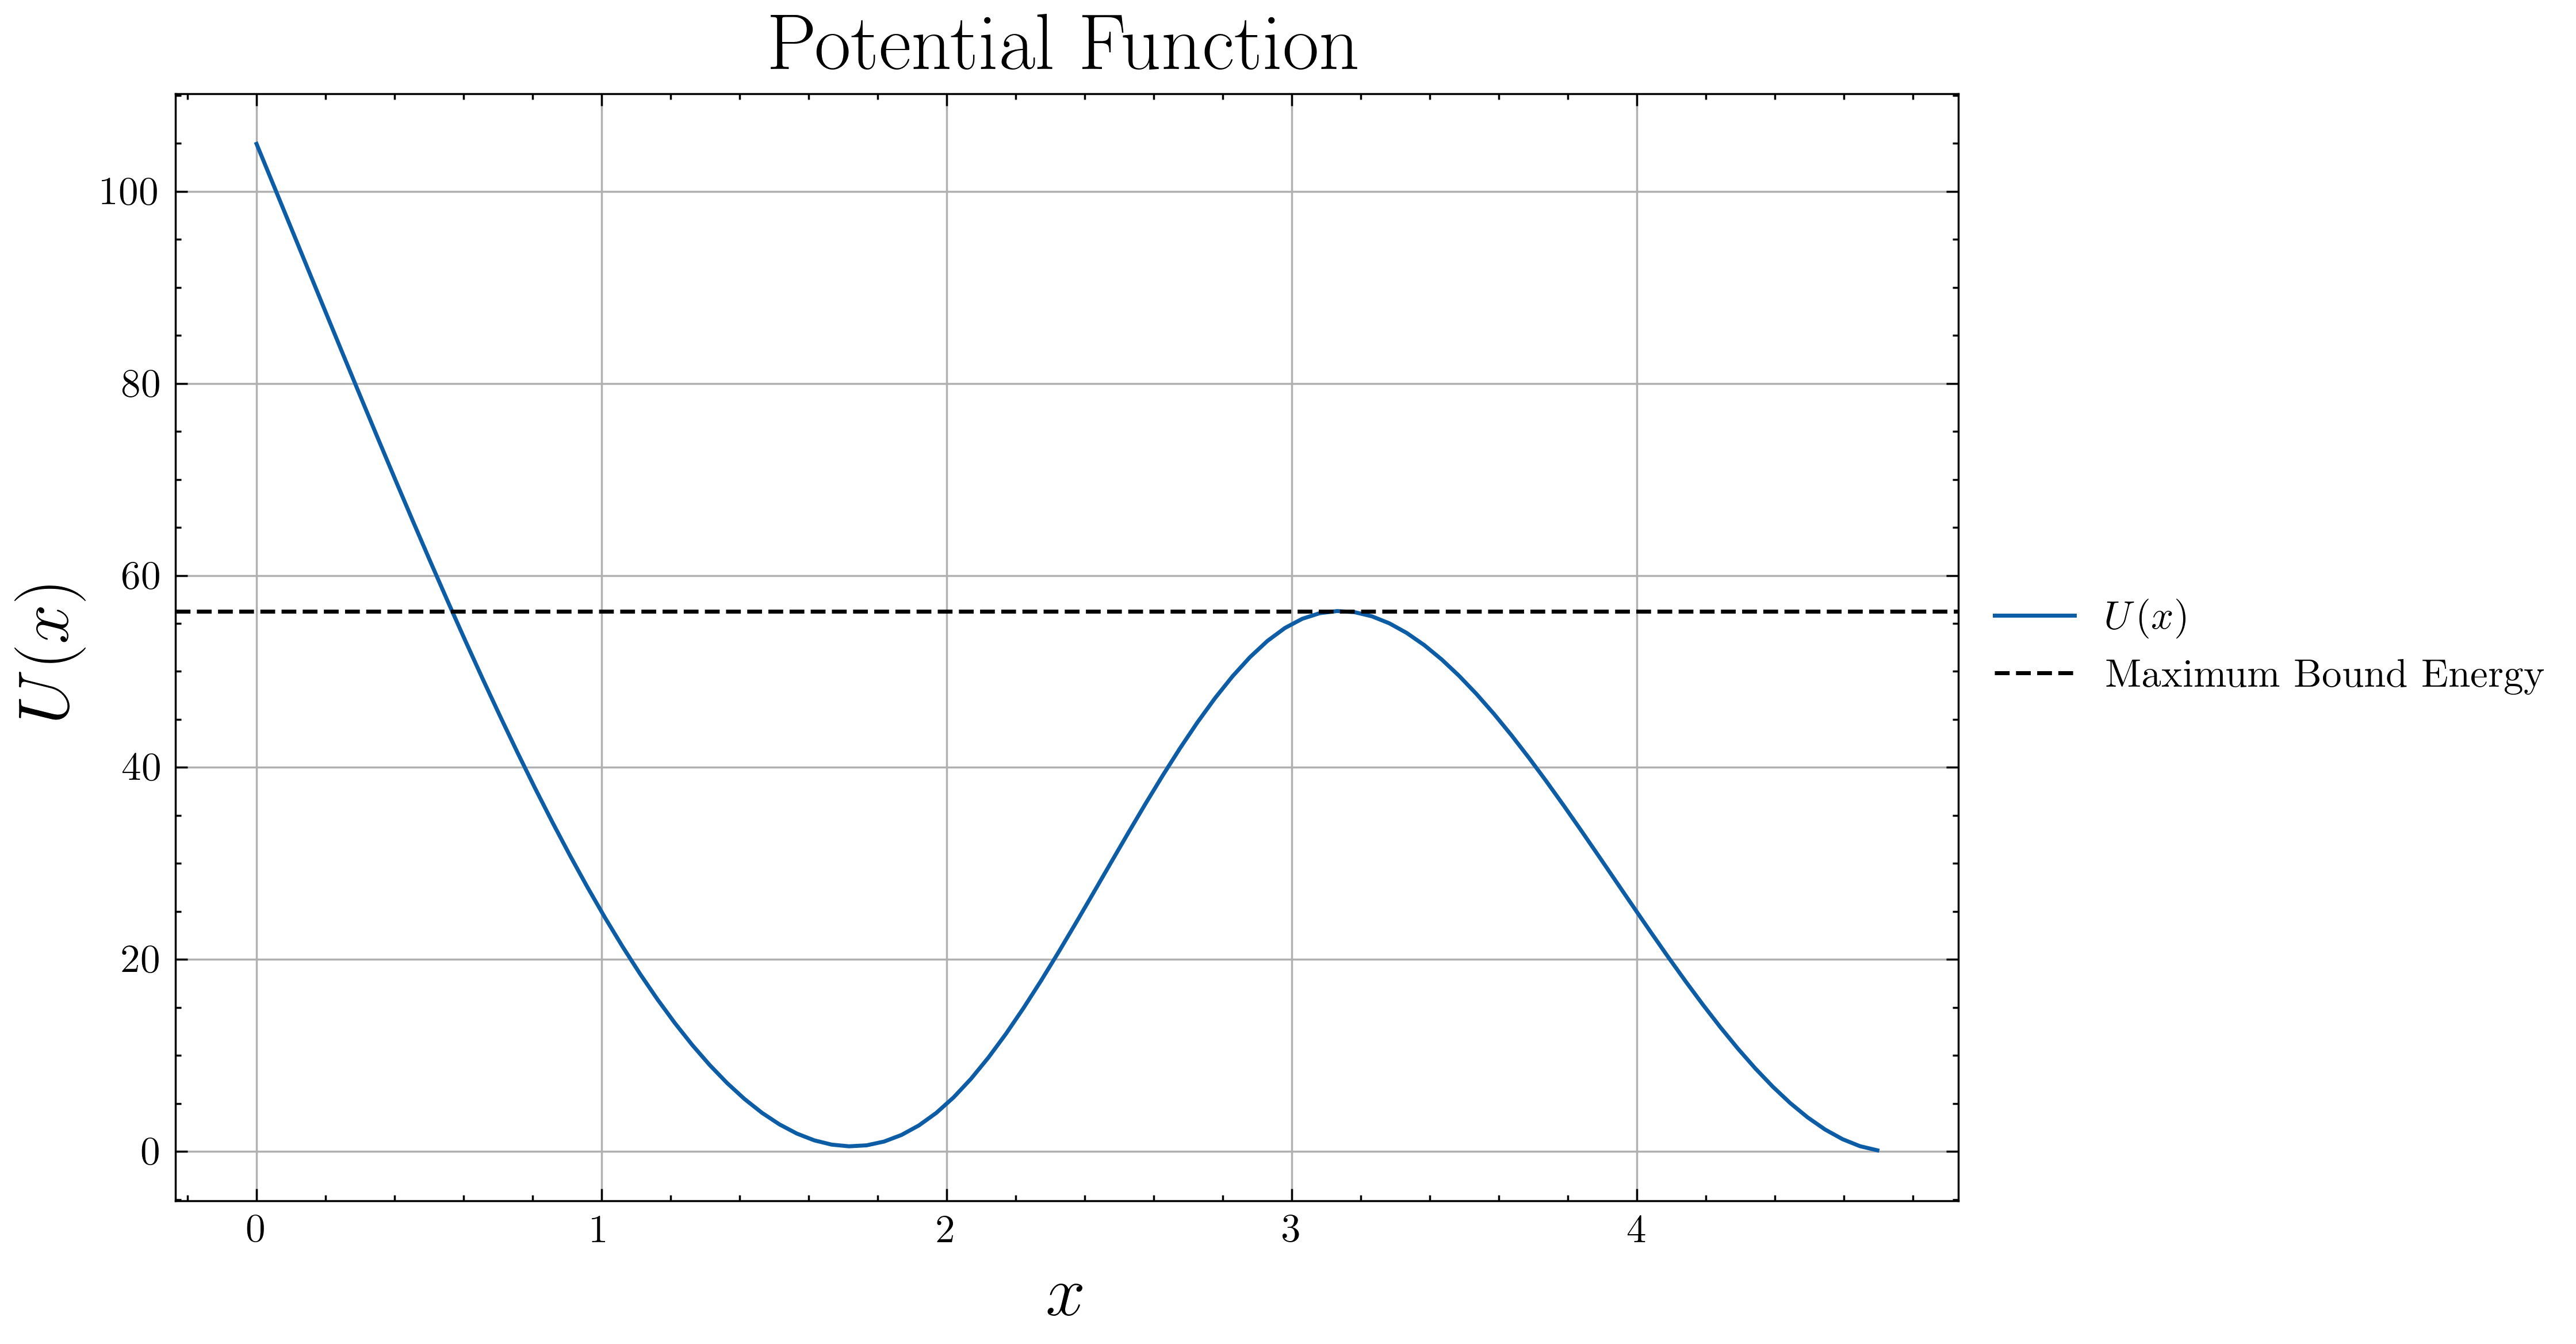

In [392]:
# Plotting the potential energy with the maximum energy
plt.figure(figsize=[8, 5], dpi=500)
plt.title("Potential Function", fontsize=20)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$U(x)$", fontsize=18)
plt.grid(True)
plt.plot(x,y, label="$U(x)$")
plt.axhline(stationary_points_y[1], linestyle="--", label="Maximum Bound Energy", color="k")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

## d) Find and plot the allowed region for this bound particle

This will be between the values where $U(x)$ equals the maximum bound energy.

The particle is bound between (0.567 < x < 3.140).


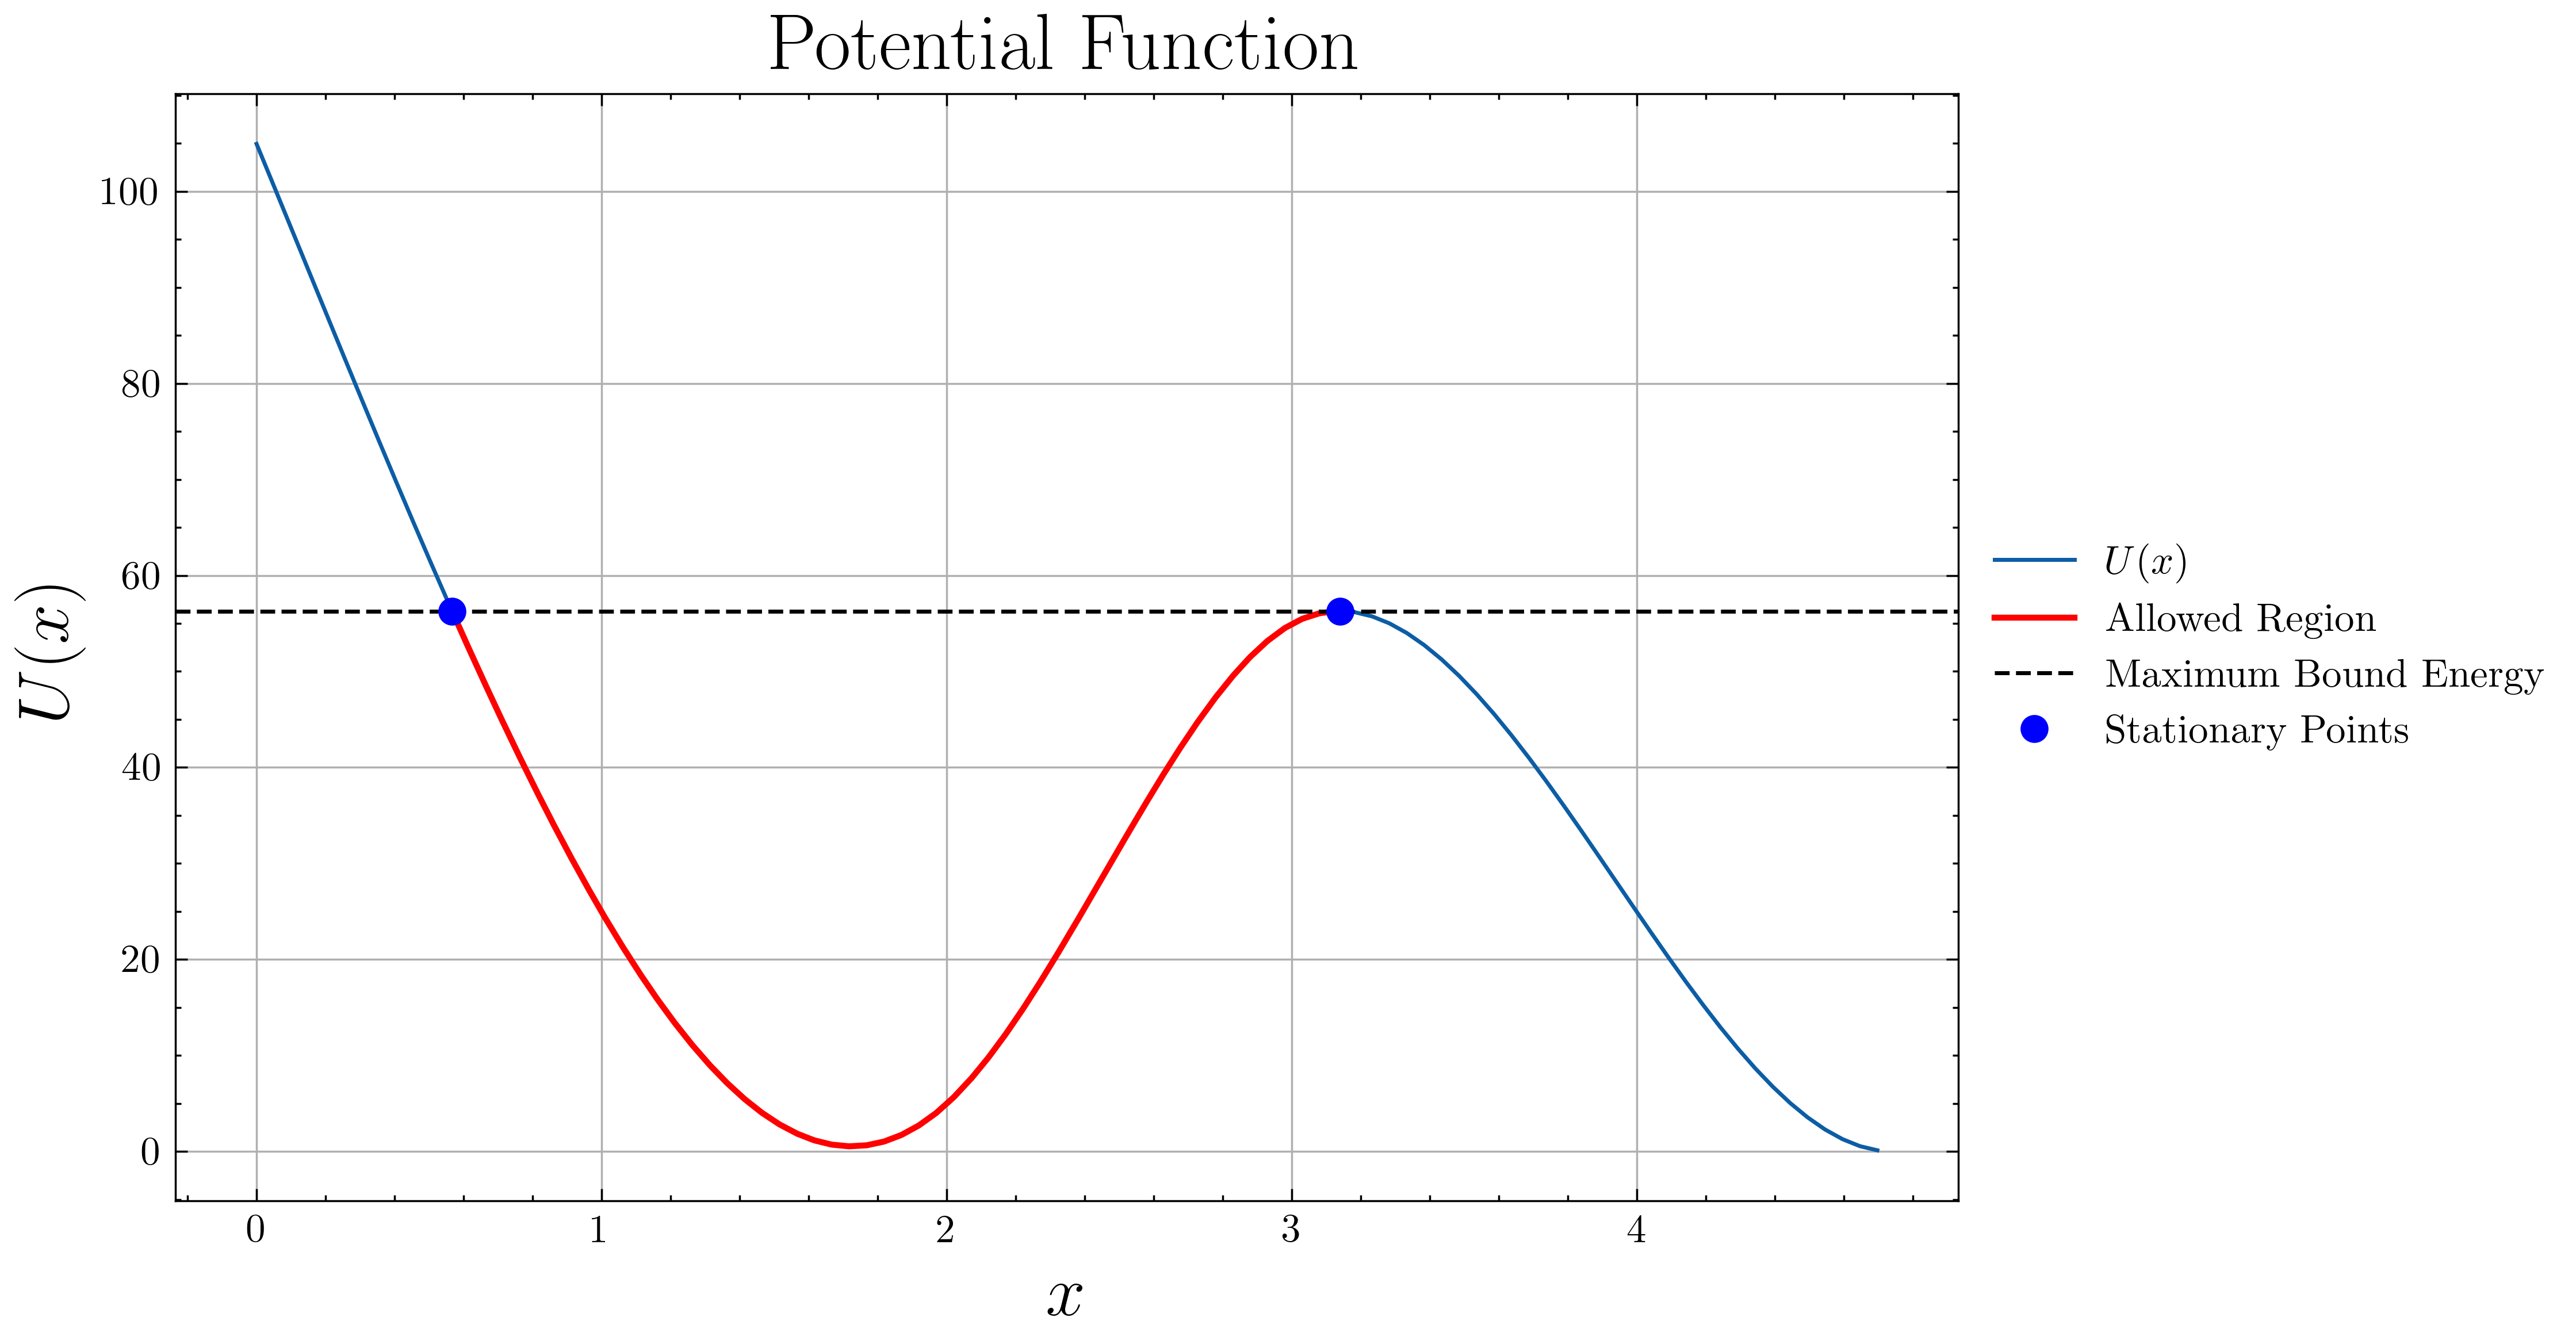

In [393]:
# Finding intersection of U(x) and the M.B.E.

# Define intersection function
def intersection_function(x_val):
    return potential_function(x_val) - stationary_points_y[1]

# Solving for when this function is equal to 0 to find the x-coordinate of intersection
intersection_x = float(fsolve(intersection_function, 0.5, xtol=1e-5))

print(f"The particle is bound between ({intersection_x:.3f} < x < {stationary_points_x[1]:.3f}).")

# Plotting the allowed region
x_allowed = np.linspace(intersection_x, stationary_points_x[1], 500)
y_allowed = potential_function(x_allowed)

plt.figure(figsize=[8, 5], dpi=500)
plt.title("Potential Function", fontsize=20)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$U(x)$", fontsize=18)
plt.grid(True)
plt.plot(x, y, label="$U(x)$")
plt.plot(x_allowed, y_allowed, color='red', linewidth=1.5, label='Allowed Region')
plt.axhline(stationary_points_y[1], linestyle="--", label="Maximum Bound Energy", color="k")
plt.plot([intersection_x ,stationary_points_x[1]], [stationary_points_y[1], stationary_points_y[1]],"o", label="Stationary Points",color="b")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)